# Bank Marketing Campaign (Direct Phone Calls) - Opening Deposit

### Business Problem

1. Conversion rate dari konsumen yang setuju membuka deposito hanya 47.4%, hal ini menunjukan bahwa marketing campaign yang sudah terlaksana belum efektif
2. Marketing cost hanya cukup untuk 40% dari total konsumen

### Objectives

1. Menentukan profile konsumen yang cenderung ingin membuka deposito berjangka berdasarkan metode Exploratory Data Analysis
2. Memberikan rekomendasi metode campaign untuk meningkatkan conversion rate dari aktivitas marketing campaign
3. Memprediksi hasil dari aktivitas marketing campaign berdasarkan kemampuan Machine Learning

### Info Data Set

https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

# 1. Import Library

In [6]:
#===== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#===== Skelarn =====#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#===== Evaluation =====#
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)

from sklearn.metrics import confusion_matrix

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [7]:
df = pd.read_csv('bank (1).csv')

In [163]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1,-1,0,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1,-1,0,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1,-1,0,1
3,55,services,married,secondary,no,2476,yes,no,5,may,1,-1,0,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,2,-1,0,1


# 3. Function

## 3.1 Check Info Data

In [8]:
def info_data(data) :
    pd.set_option('display.max_rows',None)
    missing_values = data.isnull().sum()
    missing_perc = (missing_values/len(data))*100
    data_type = data.dtypes
    num_unique = data.nunique()
    
    print (f'Number of Rows,Columns {data.shape}')
    print (f'Number of Duplicated Values {data.duplicated().sum()}')
    
    return pd.DataFrame ({'Missing_value' : missing_values,
                          'Percent_missing_%' : missing_perc,
                          'Data_type' : data_type,
                          'Number of Unique' : num_unique}).sort_values('Percent_missing_%',ascending=False)
    

In [164]:
info_data(df)

Number of Rows,Columns (11162, 14)
Number of Duplicated Values 2


,Missing_value,Percent_missing_%,Data_type,Number of Unique
age,0,0.0,int64,76
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,3805
housing,0,0.0,object,2
loan,0,0.0,object,2
day,0,0.0,int64,31
month,0,0.0,object,12


## 3.2 Check Outlier

In [9]:
def outlier(df,column) :
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    
    outlier_list=df[column].apply(lambda x:'outlier' if x<lower or x>upper else 'not-outlier')
    print (f' outlier lower limit : {lower} \n outlier upper limit : {upper}')
    return outlier_list

## 3.3 Visualization

In [10]:
def hist_boxplot(df,x,y=None,hue=None) :
    if y==None :
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        sns.boxplot(data=df,x=x)
        
        plt.subplot(212)
        sns.histplot(data=df,x=x)
        plt.tight_layout()
        plt.show()
        
    elif hue==None :
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        sns.box(data=df,x=x,y=y)
        
        plt.subplot(212)
        sns.histplot(data=df,x=x,y=y)
        plt.tight_layout()
        plt.show()
        
    else :
        plt.figure(figsize=(8,8))
        plt.subplot(211)
        sns.box(data=df,x=x,y=y,hue=hue)
        
        plt.subplot(212)
        sns.histplot(data=df,x=x,y=y,hue=hue)
        plt.tight_layout()
        plt.show()

## 3.4 EDA 

In [11]:
#catergoric vs target

def predictor_target (p,t='deposit') :
    ((X_train.groupby([p])[t].mean())/((X_train.groupby([p])[t].mean()).sum())*100).sort_values(ascending=True).plot(kind='bar')
    plt.xticks(rotation=0);
    plt.ylabel('Conversion Rate',fontsize=12)
         

    if p=='age_cat' :
        return plt.title('Umur vs Conversion Rate',fontsize=12) and plt.xlabel('Umur',fontsize=12)
    elif p=='loan' :
        return plt.title('Personal Loan vs Conversion Rate',fontsize=12) and plt.xlabel('Personal Loan',fontsize=12)  
    elif p=='housing' :
        return plt.title('Cicilan Rumah vs Conversion Rate',fontsize=12)  and  plt.xlabel('Cicilan Rumah',fontsize=12)
    elif p=='default' :
        return plt.title('Gagal Bayar vs Conversion Rate',fontsize=12)  and  plt.xlabel('Gagal Bayar',fontsize=12)
    elif p=='education' :
        return plt.title('Pendidikan vs Conversion Rate',fontsize=12)  and  plt.xlabel('Pendidikan',fontsize=12)
    elif p=='job' :
        return plt.title('Pekerjaan vs Conversion Rate',fontsize=12)  and  plt.xlabel('Pekerjaan',fontsize=12)
    elif p=='marital' :
        return plt.title('Status vs Conversion Rate',fontsize=12)  and  plt.xlabel('Status',fontsize=12)  
    elif p=='campaign_cat' :
        return plt.title('Jumlah Campaign vs Conversion Rate',fontsize=12)  and  plt.xlabel('Jumlah Campaign',fontsize=12)  
    elif p=='quarter' :
        return plt.title('Last Contact(Q) vs Conversion Rate',fontsize=12)  and  plt.xlabel('Last Contact(Q)',fontsize=12)  
    elif p=='week' :
        return plt.title('Last Contact(W) vs Conversion Rate',fontsize=12)  and  plt.xlabel('Last Contact(W)',fontsize=12)  
    else :
        return plt.title('Contact/Tidak) vs Conversion Rate',fontsize=12)  and  plt.xlabel('Contact/Tidak',fontsize=12)  
    
    
    plt.show()
        

In [12]:
#categorical vs categorical (deposit yes)

def predictor_predictor_y(p1,p2) :
    p1_p2= pd.crosstab(X_train[p1],X_train[p2]).unstack(level=1).reset_index()
    p1_p2 = p1_p2.rename(columns={0:'count'})
    p1_p2= p1_p2[p1_p2[p1]=='yes']
    p1_p2['percent'] = round(((p1_p2["count"]/sum(p1_p2["count"]))*100),1)
    p1_p2
    
     
    plt.figure(figsize=(8,6))
    sns.barplot(data=p1_p2,x=p2,y='percent')
    

    if p1=='loan' and p2=='age_cat' :
        return plt.title('Umur vs Debtor(Personal Loan)',fontsize=14) and plt.ylabel('Debtor(Personal Loan)',fontsize=12) and plt.xlabel('Umur',fontsize=12)
    elif p1=='housing' and p2=='age_cat' :
        return plt.title('Umur vs Debtor(Cicilan Rumah)',fontsize=14) and plt.ylabel('Debtor(Cicilan Rumah)',fontsize=12) and plt.xlabel('Umur',fontsize=12)
    elif p1=='default' and p2=='age_cat' :
        return plt.title('Umur vs Debtor(Gagal Bayar)',fontsize=14) and plt.ylabel('Debtor(Gagal Bayar)',fontsize=12) and plt.xlabel('Umur',fontsize=12)
    elif p1=='loan' and p2=='marital' :
        return plt.title('Status vs Debtor(Personal Loan)',fontsize=14) and plt.ylabel('Debtor(Personal Loan)',fontsize=12) and plt.xlabel('Status',fontsize=12)
    elif p1=='housing' and p2=='marital' :
        return plt.title('Status vs Debtor(Cicilan Rumah)',fontsize=14) and plt.ylabel('Debtor(Cicilan Rumah)',fontsize=12) and plt.xlabel('Status',fontsize=12)
    else :
        return plt.title('Status vs Debtor(Gagal Bayar)',fontsize=14) and plt.ylabel('Debtor(Gagal Bayar)',fontsize=12) and plt.xlabel('Status',fontsize=12)
  
    
    
    plt.show()

In [13]:
#categorical vs categorical (tidak berhubungan dengan target)

def n_predictor(p1,p2) :
    ((pd.crosstab(X_train[p1],X_train[p2]).apply(lambda x:x/x.sum(),axis=1))*100).plot(kind='bar')
    plt.ylabel('Jumlah',fontsize=12)
    
    if p1=='job' and p2=='education' :
        return plt.title('Pekerjaan vs Pendidikan',fontsize=12) and plt.xlabel('Pekerjaan,Pendidikan',fontsize=12)
    elif p1=='age_cat' and p2=='job' : 
        return plt.title('Umur vs Pekerjaan',fontsize=12) and plt.xlabel('Umur,Pekerjaan',fontsize=12)
    elif p1=='age_cat' and p2=='education' : 
        return plt.title('Umur vs Pendidikan',fontsize=12) and plt.xlabel('Umur,Pendidikan',fontsize=12)
    elif p1=='age_cat' and p2=='marital' : 
        return plt.title('Umur vs Status',fontsize=12) and plt.xlabel('Umur,Status',fontsize=12)
    
    plt.show()

In [14]:
def chi_statistik (p1,t) :
    obs_p1 = pd.crosstab(X_train[p1],X_train[t])
    chi2, p, dof, expected = chi2_contingency(obs_p1)
    alpha = 0.05
    
    if p<alpha :
        if p1 =='loan' :
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya personal loan')
        elif p1 =='housing' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya cicilan rumah')
        elif p1 =='default' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya gagal bayar')
        elif p1 =='education' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi status pendidikan')
        elif p1 =='job' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi pekerjaan')
        elif p1 =='marital' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi status pernikahan')
        elif p1 =='quarter' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi last contact(quarter)')
        elif p1 =='week' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTerdapat perbedaan conversion rate yang signifikan dari segi last contact(week)')
        
    else :
        if p1 =='loan' :
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya personal loan')
        elif p1 =='housing' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya cicilan rumah')
        elif p1 =='default' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya gagal bayar')
        elif p1 =='education' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi status pendidikan')
        elif p1 =='job' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi pekerjaan')
        elif p1 =='marital' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi status pernikahan')
        elif p1 =='quarter' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi last contact(quarter)')
        elif p1 =='week' : 
            return print (f'Chi-square Statistic : {chi2} ,p-value: {p} kurang dari {alpha} \nTidak terdapat perbedaan conversion rate yang signifikan dari segi last contact(week)')

## 3.5 Model Evaluation 

In [15]:
def eval_train (X,y,model) :
    model.fit(X,y)
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {precision_score(y,prediction)}')
    
    disp.plot() 

In [16]:
def eval_test (X,y,model) :
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {precision_score(y,prediction)}')
    
    disp.plot()

# 4. Data Inspection

In [17]:
#Melihat 5 kolom pertama
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
info_data(df)

Number of Rows,Columns (11162, 17)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
age,0,0.0,int64,76
day,0,0.0,int64,31
poutcome,0,0.0,object,4
previous,0,0.0,int64,34
pdays,0,0.0,int64,472
campaign,0,0.0,int64,36
duration,0,0.0,int64,1428
month,0,0.0,object,12
contact,0,0.0,object,3
job,0,0.0,object,12


In [19]:
#cek unique value
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()
    

===== age =====
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

===== job =====
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

===== marital =====
['married' 'single' 'divorced']

===== education =====
['secondary' 'tertiary' 'primary' 'unknown']

===== default =====
['no' 'yes']

===== balance =====
[2343   45 1270 ... 1594 2593 -134]

===== housing =====
['yes' 'no']

===== loan =====
['no' 'yes']

===== contact =====
['unknown' 'cellular' 'telephone']

===== day =====
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]

===== month =====
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

===== duration =====
[1042 1467 1389 ... 150

#### Summary
1. Tidak ada duplicated value
2. Tidak ada missing value
3. Drop feature 'contact' --> asumsi : tidak ada perbedaan antara phone dan cellular
4. Drop feature 'poutcome' dan 'duration' --> data feature ini akan muncul setelah aktivitas campaign dilakukan
5. Mengganti data feature 'deposit' menjadi 1,0 (1=yes, 0=no)

In [20]:
#replace data pada deposit
df['deposit']= df['deposit'].replace(['yes','no'],[1,0])

In [21]:
#drop feature 'poutome' and 'duration'
df=df.drop(['poutcome','duration','contact'],axis=1)

In [22]:
info_data(df)

Number of Rows,Columns (11162, 14)
Number of Duplicated Values 2


,Missing_value,Percent_missing_%,Data_type,Number of Unique
age,0,0.0,int64,76
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,3805
housing,0,0.0,object,2
loan,0,0.0,object,2
day,0,0.0,int64,31
month,0,0.0,object,12


#### Summary 
1. Feature 'contact','poutcome','duration' sudah dihapus
2. Data feature 'deposit' sudah berisi 1,0 


# 5. Exploratory Data Analysis

## 5.1 Splitting Data Train and Test

In [23]:
#cek perbandingan target
a= df['deposit'].value_counts(normalize=True)

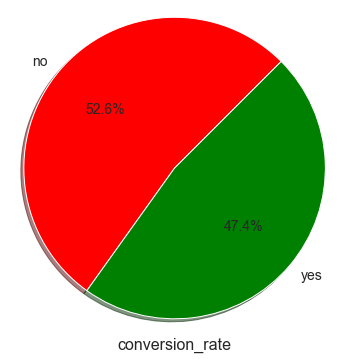

In [24]:
plt.figure(figsize=(6,6))

conversion_rate = a.index
count = a.values
colors= ['red','green']

plt.pie(count, labels=['no','yes'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 14})

plt.xlabel('conversion_rate',fontsize=16)
plt.axis('equal')
plt.show()

In [25]:
X = df.drop('deposit',axis=1).copy()
y = df['deposit'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [26]:
X_train['deposit'] = y_train
X_test['deposit'] = y_test

In [27]:
info_data(X_train)

Number of Rows,Columns (7813, 14)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
age,0,0.0,int64,75
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,3191
housing,0,0.0,object,2
loan,0,0.0,object,2
day,0,0.0,int64,31
month,0,0.0,object,12


#### Summary 
1. total column = 14
2. total row = 7813 (70%data frame)

## 5.2 Descriptive Statistic

In [28]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7813.0,41.237169,11.850243,18.0,32.0,39.0,49.0,95.0
balance,7813.0,1536.787278,3215.999050,-3058.0,124.0,553.0,1730.0,81204.0
day,7813.0,15.605273,8.419817,1.0,8.0,15.0,21.0,31.0
campaign,7813.0,2.499552,2.722798,1.0,1.0,2.0,3.0,63.0
pdays,7813.0,49.952643,107.826919,-1.0,-1.0,-1.0,-1.0,854.0
previous,7813.0,0.802253,2.135139,0.0,0.0,0.0,0.0,41.0
deposit,7813.0,0.471266,0.499206,0.0,0.0,0.0,1.0,1.0


1. Rata-rata umur adalah 41, umur minimal 18 dan umur maksimal 95.<br/>
Data dapat dikatakan normal, karna masih ada manusia yang berumur 95 keatas <br/>
2. Rata-rata balance adalah 1536 dollar, balance minimal -3058 dollar, dan balance maksimal 81204 dollar <br/>
Tanda minus berarti konsumen memiliki hutang
3. Data day dapat diartikan sebagai tanggal dalam satu bulan
4. Rata-rata jumlah campaign adalah 3, jumlah minimal 1 dan jumlah maksimal 63
5. Untuk data pdays dan previous, 75% konsumen tidak pernah dikontak (0,-1 = tidak pernah dikontak)


## 5.3 Consumer's Profile Analysis

### 5.3.1 Umur vs Conversion Rate 

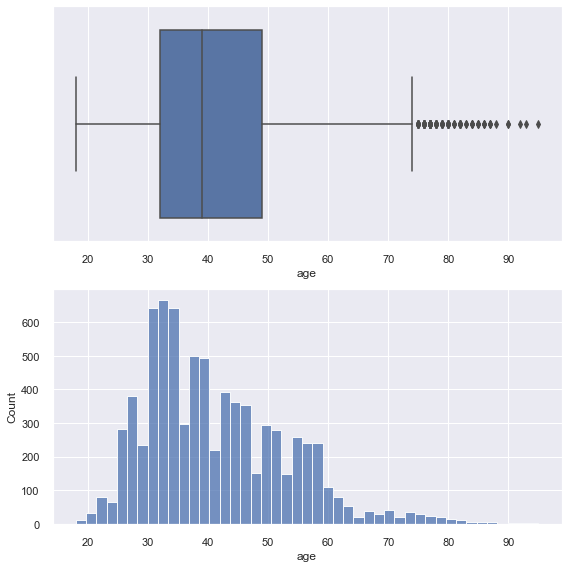

In [29]:
hist_boxplot(X_train,'age')

In [30]:
#cek outlier
X_train['outlier_age'] = outlier(X_train,'age')
X_train[X_train['outlier_age']=='outlier']

 outlier lower limit : 6.5 
 outlier upper limit : 74.5


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,outlier_age
3130,77,retired,married,tertiary,no,7802,no,no,1,feb,2,-1,0,1,outlier
1487,76,housemaid,divorced,primary,no,1411,no,no,15,apr,3,-1,0,1,outlier
3014,79,retired,married,primary,no,3025,no,no,11,dec,3,126,3,1,outlier
3945,84,retired,married,tertiary,no,4761,no,no,9,sep,1,92,3,1,outlier
1603,75,retired,married,tertiary,no,2991,no,no,22,apr,1,-1,0,1,outlier
2823,76,retired,married,secondary,no,4112,no,no,23,oct,2,-1,0,1,outlier
2885,76,retired,married,primary,no,1492,no,no,3,nov,1,-1,0,1,outlier
6227,75,retired,divorced,secondary,no,2199,no,no,13,nov,1,-1,0,0,outlier
5799,77,retired,divorced,primary,no,639,no,no,16,apr,7,-1,0,0,outlier
1582,95,retired,divorced,primary,no,2282,no,no,21,apr,17,-1,0,1,outlier


In [31]:
(X_train['outlier_age'].value_counts(normalize=True))*100

not-outlier    98.528094
outlier         1.471906
Name: outlier_age, dtype: float64

Karna outlier mengandung informasi, maka outlier tetap dipertahankan untuk proses EDA

In [32]:
#drop feature outlier_age
X_train = X_train.drop('outlier_age',axis=1)

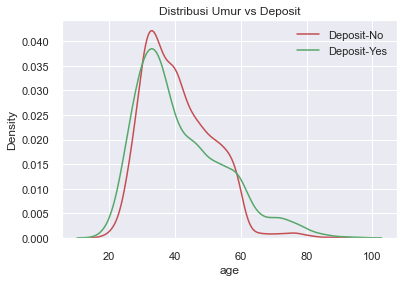

In [33]:
#distribusi umur vs deposit

sns.distplot(X_train[X_train['deposit']==0]['age'],color='r',hist=False,label='Deposit-No')
sns.distplot(X_train[X_train['deposit']==1]['age'],color='g',hist=False,label='Deposit-Yes')
plt.title('Distribusi Umur vs Deposit',fontsize=12)
plt.legend()


In [34]:
#uji statistik

deposit_yes_1 = X_train[X_train['deposit']==1]['age']
deposit_no_1 = X_train[X_train['deposit']==0]['age']

alpha = 0.05
t_value1,p_value1 = stats.ttest_ind(deposit_yes_1,deposit_no_1)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan signifikan deposit dari segi umur')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan signifikan deposit dari segi umur')

Kesimpulan : nilai p_value 0.006925639874188874 kurang dari alpha 0.05
Ada perbedaan signifikan deposit dari segi umur


In [35]:
#mengelompokkan umur 
def bin_age (x) :
    if x<=30 :
        return '21-30'
    elif x<=40 :
        return '31-40'
    elif x<=50 :
        return '41-50'
    elif x<=60 :
        return '51-60'  
    else :
        return '61+'

#### pengelompokkan umur berdasarkan : <br/> 
1. Rata-rata usia pensiun (60 ±) 
2. Usia produktif dan belum menikah (21-30)
3. Usia produktif dan sudah menikah (30~50)

In [36]:
X_train['age_cat'] = X_train['age'].apply(bin_age)
X_train['age_cat'].unique()

array(['51-60', '31-40', '41-50', '21-30', '61+'], dtype=object)

Text(0.5, 0, 'Umur')

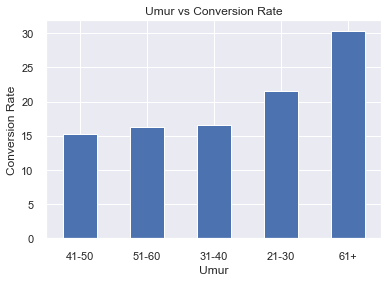

In [37]:
#hubungan umur dengan conversion rate
predictor_target('age_cat')

##### Berdasarkan barchat, dapat diketahui bahwa umur mempengaruhi conversion rate. Dan hal ini didukung dengan hasil uji statistik, dimana nilai p-value kurang dari alpha.

##### Umur 61+ memiliki conversion rate paling tinggi yaitu sebesar 30.4%. Lalu diikuti oleh usia 21-30 yang memiliki conversion rate sebesar 21.6%. Rentang usia 31-40, 41-50, 51-60 memiliki conversion rate yang tidak jauh berbeda yaitu 16.5%, 15.2% dan 16.3%

### 5.3.2  Balance vs Conversion Rate 

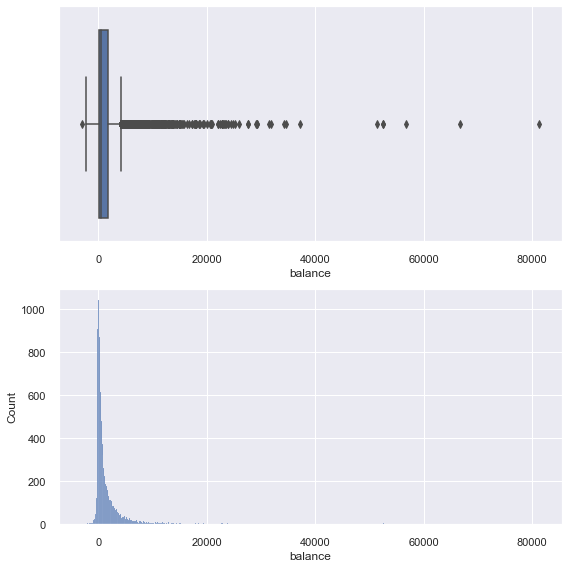

In [38]:
hist_boxplot(X_train,'balance')

In [39]:
#cek outlier
X_train['outlier_balance'] = outlier(X_train,'balance')
X_train[X_train['outlier_balance']=='outlier'].head(10)

 outlier lower limit : -2285.0 
 outlier upper limit : 4139.0


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,age_cat,outlier_balance
812,46,technician,single,tertiary,no,4414,no,no,18,aug,7,-1,0,1,41-50,outlier
1092,28,unknown,single,secondary,no,4465,no,no,28,jan,1,-1,0,1,21-30,outlier
5339,49,entrepreneur,single,secondary,no,5802,no,no,12,aug,3,104,2,0,41-50,outlier
5426,53,management,divorced,tertiary,no,6388,yes,no,23,jul,2,-1,0,0,51-60,outlier
10629,28,self-employed,single,tertiary,no,5215,no,no,2,jun,1,-1,0,0,21-30,outlier
3130,77,retired,married,tertiary,no,7802,no,no,1,feb,2,-1,0,1,61+,outlier
4881,53,blue-collar,married,secondary,no,6112,no,no,3,feb,1,-1,0,1,51-60,outlier
10992,45,blue-collar,married,primary,no,6691,no,no,13,aug,2,-1,0,0,41-50,outlier
4401,34,management,single,unknown,no,6013,yes,no,18,may,1,-1,0,1,31-40,outlier
2362,28,management,single,tertiary,no,12956,yes,no,2,jul,1,399,3,1,21-30,outlier


In [40]:
(X_train['outlier_balance'].value_counts(normalize=True))*100

not-outlier    90.810188
outlier         9.189812
Name: outlier_balance, dtype: float64

Karna outlier mengandung informasi, maka outlier tetap dipertahankan

In [41]:
#drop outlier_balance
X_train = X_train.drop('outlier_balance',axis=1)

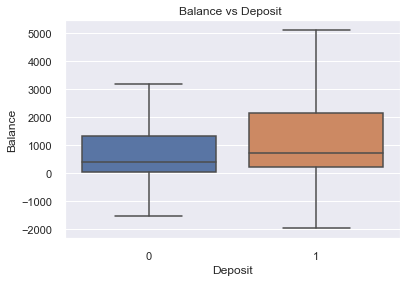

In [42]:
#hubungan balance dengan deposit 

sns.boxplot(data=X_train,x='deposit',y='balance',showfliers=False)
plt.title('Balance vs Deposit ',fontsize=12)
plt.ylabel('Balance',fontsize=12)
plt.xlabel('Deposit',fontsize=12)
plt.show()

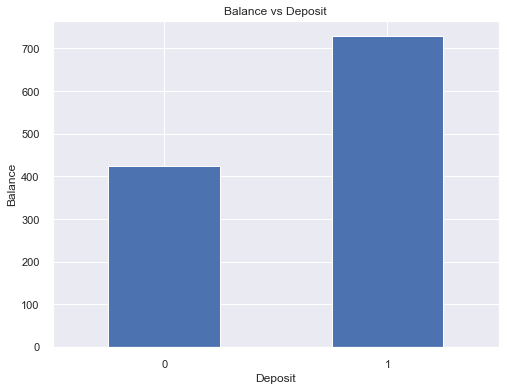

In [43]:
#hubungan balance dengan deposit 

plt.figure(figsize=(8,6))
(X_train.groupby(['deposit'])['balance'].median()).plot(kind='bar')
plt.title('Balance vs Deposit',fontsize=12)
plt.ylabel('Balance',fontsize=12)
plt.xlabel('Deposit',fontsize=12)
plt.xticks(rotation=0);
plt.show()

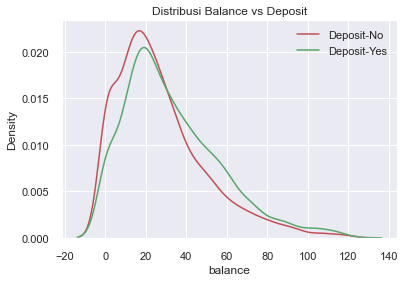

In [44]:
#distribusi balance vs deposit

X_train_filter = X_train[X_train['balance']<15000]
sns.distplot(np.sqrt(X_train_filter[X_train_filter['deposit']==0]['balance']),color='r',hist=False,label='Deposit-No')
sns.distplot(np.sqrt(X_train_filter[X_train_filter['deposit']==1]['balance']),color='g',hist=False,label='Deposit-Yes')
plt.title('Distribusi Balance vs Deposit',fontsize=12)
plt.legend()

In [45]:
#uji statisik

deposit_yes_2 = np.sqrt(X_train_filter[X_train_filter['deposit']==1]['balance'])
deposit_no_2 = np.sqrt(X_train_filter[X_train_filter['deposit']==0]['balance'])

alpha = 0.05
t_value_2,p_value2 = stats.ttest_ind(deposit_yes_2,deposit_no_2)

if p_value2 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value2} kurang dari alpha {alpha}')
    print('Ada perbedaan signifikan deposit dari segi balance')

else :
    print(f'Kesimpulan : nilai p_value {p_value2} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan signifikan deposit dari segi balance')

Kesimpulan : nilai p_value nan lebih dari alpha 0.05
Tidak ada perbedaan signifikan deposit dari segi balance


##### Jika kita lihat barchat, terdapat perbedaan jumlah balance konsumen yang membuka deposito berjangka dan tidak. Rata-rata balance konsumen yang membuka deposito berjangka adalah 729 dollar, sedangkan yang tidak membuka deposito berjangka memiliki rata-rata balance sebesar 424 dollar

##### Tetapi jika kita analisa lebih lanjut menggunakan uji statistik, ternyata tidak ada perbedaan signifikan dari segi balance antara konsumen yang membuka deposito dan tidak. Maka feature ini akan didrop saat proses feature selection

### 5.3.3 Personal Loan vs Conversion Rate 

Text(0.5, 0, 'Personal Loan')

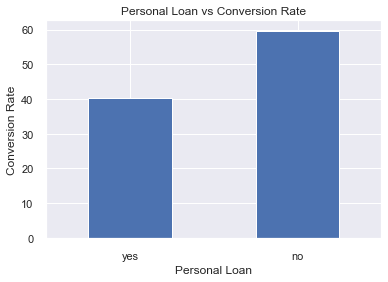

In [46]:
#hubungan pinjaman dengan conversion rate
predictor_target('loan')


In [47]:
chi_statistik('loan','deposit')

Chi-square Statistic : 92.1189685795012 ,p-value: 8.16192772003411e-22 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya personal loan


##### Konsumen yang memiliki personal pinjaman cenderung tidak ingin membuka depostio berjangka. Conversion rate konsumen dengan personal pinjaman (40.3%) lebih rendah daripada yang tidak memiliki pinjaman (59.7%). Hal ini didukung dengan  hasil uji statistik (p=8.16e-22)

### 5.3.4 Cicilan Rumah vs Conversion Rate 

Text(0.5, 0, 'Cicilan Rumah')

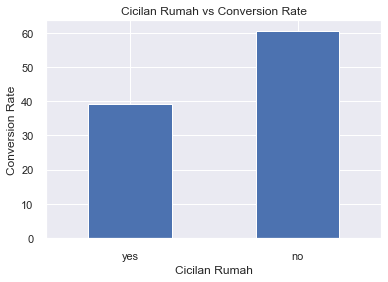

In [48]:
#hubungan cicilan rumah dengan conversion rate
predictor_target('housing')

In [49]:
chi_statistik('housing','deposit')

Chi-square Statistic : 306.5205996614736 ,p-value: 1.2508413757464674e-68 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya cicilan rumah


##### Konsumen yang memiliki cicilan rumah cenderung tidak ingin membuka depostio berjangka. Conversion rate konsumen yang memiliki cicilan rumah (39.3%) lebih rendah daripada yang tidak memiliki cicilan rumah (60.7%). Hal ini didukung dengan hasil uji statistik (p=1.25e-68)

### 5.3.5 Gagal Bayar vs Conversion Rate 

Text(0.5, 0, 'Gagal Bayar')

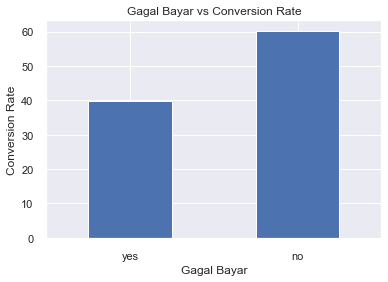

In [50]:
#hubungan gagal bayar dengan conversion rate
predictor_target('default')

In [51]:
chi_statistik('default','deposit')

Chi-square Statistic : 10.857403769812722 ,p-value: 0.0009840155129730744 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi ada/tidaknya gagal bayar


##### Hasil uji statistik menunjukkan bahwa gagal bayar memiliki pengaruh terhadap conversion rate (pvalue = 0.00098). Konsumen yang pernah gagal bayar memiliki conversion rate (39.75%) lebih rendah dibandingkan konsumen yang bayar tagihan tepat waktu (cr=60.25%)

### 5.3.6 Pendidikan vs Conversion Rate 

In [52]:
(X_train['education'].value_counts(normalize=True))*100

secondary    48.483297
tertiary     33.777038
primary      13.285550
unknown       4.454115
Name: education, dtype: float64

In [53]:
#replace unknown dgn modus (secondary)
X_train['education'] =X_train['education'].replace('unknown','secondary')

In [54]:
X_train['education'].value_counts()

secondary    4136
tertiary     2639
primary      1038
Name: education, dtype: int64

Text(0.5, 0, 'Pendidikan')

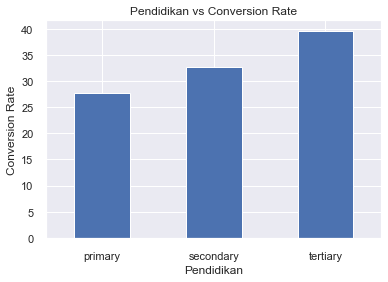

In [55]:
#hubungan education dengan conversion rate
predictor_target('education')

In [56]:
chi_statistik('education','deposit')

Chi-square Statistic : 99.45308699184167 ,p-value: 2.5353420272856645e-22 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi status pendidikan


##### Dari bachart dan hasil uji statistik (pvalue = 2.53e-22), dapat disimpulkan bahwa pendidikan mempengaruhi conversion rate. <br/>Dimana semakin tinggi status pendidikan, semakin besar convertion rate. <br/>Convestion rate primary,secondary,tertiary adalah 27,6%, 32,7%, 39,7%

### 5.3.7 Pekerjaan vs Conversion Rate

In [57]:
(X_train['job'].value_counts(normalize=True))*100

management       23.281710
blue-collar      17.240497
technician       16.139767
admin.           11.788046
services          8.293869
retired           6.988353
self-employed     3.929349
student           3.186996
unemployed        3.161398
entrepreneur      2.713426
housemaid         2.598234
unknown           0.678357
Name: job, dtype: float64

In [58]:
##grouping job berdasarkan persentase counts
X_train['job'] =X_train['job'].replace(['entrepreneur','self-employed','student','unemployed','housemaid','unknown'],
                                       ['other','other','other','other','other','other'])

Text(0.5, 0, 'Pekerjaan')

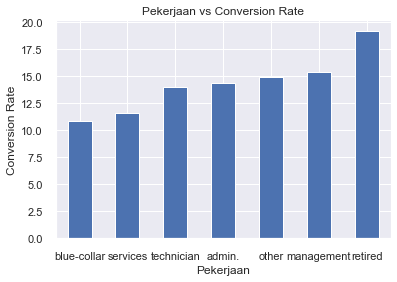

In [59]:
#hubungan pendidikan dengan conversion rate 
predictor_target('job')

In [60]:
chi_statistik('job','deposit')

Chi-square Statistic : 164.11517723037275 ,p-value: 7.95488044014975e-33 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi pekerjaan


##### Hasil uji statistik menunjukan bahwa jenis pekerjaan memiliki pengaruh terhadap conversion rate (pvalue = 7.95e-33). Konsumen yang memiliki pekerjaan sektor management (15.4%) dan seorang pensiunan (19.2%) memiliki keinginan untuk membuka deposito berjangka lebih tinggi dibandingkan yang lain. Sedangkan konsumen yang bekerja sebagai blue-collar (10.8%) dan service (11.6%) cenderung tidak ingin membuka deposito berjangka

### 5.3.8 Status vs Conversion Rate

In [61]:
(X_train['marital'].value_counts(normalize=True))*100

married     56.713170
single      31.831563
divorced    11.455267
Name: marital, dtype: float64

Text(0.5, 0, 'Status')

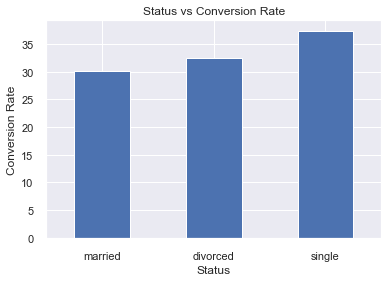

In [62]:
#hubungan status dengan conversion rate 
predictor_target('marital')

In [63]:
chi_statistik('marital','deposit')

Chi-square Statistic : 71.11451867463643 ,p-value: 3.6114239862287743e-16 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi status pernikahan


##### Hasil uji statistik menunjukan bahwa status pernikahan memiliki pengaruh terhadap conversion rate (pvalue = 3.61e-16), dimana konsumen yang belum menikah(cr=37.4%) memiliki kecenderungan membuka deposito dibandingkan yang sudah menikah (cr=30.1%)/bercerai(32.5%)

### 5.3.9 Umur vs Personal Loan, Cicilan Rumah, Gagal Bayar

Text(0.5, 0, 'Umur')

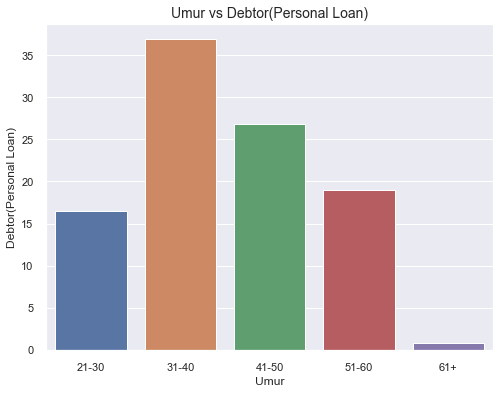

In [64]:
predictor_predictor_y('loan','age_cat')

Text(0.5, 0, 'Umur')

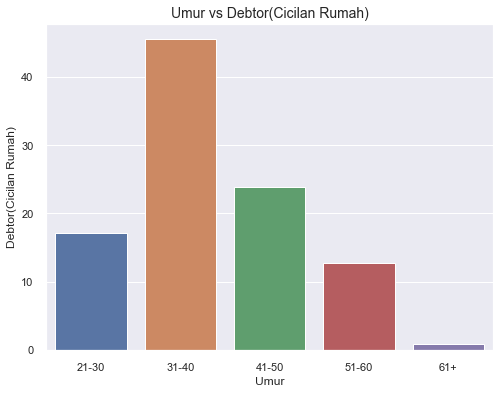

In [65]:
predictor_predictor_y('housing','age_cat')

Text(0.5, 0, 'Umur')

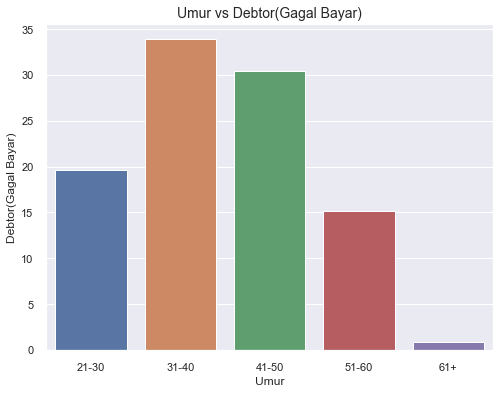

In [66]:
predictor_predictor_y('default','age_cat')

##### Dari ketiga barchat diatas, dapat dilihat kategori umur rata-rata memiliki pola yang sama. Konsumen yang memiliki personal pinjaman, cicilan rumah dan pernah gagal bayar paling banyak adalah kelompok umur 31-40, lalu diiukti 41-50, 51-40, 21-30 dan 61+

##### Jika kita lihat hubungan umur (5.3.1), personal pinjaman (5.3.3), cicilan rumah (5.3.4), dan gagal bayar (5.3.5) dengan conversion rate, seharusnya kelompok umur 31-40 bukan konsumen yang paling banyak memiliki personal pinjaman, cicilan rumah dan pernah gagal bayar, tetapi kelompok umur 41-50. Berarti dapat dikatakan bahwa ada faktor lain yang membuat kelompok umur 31-40 memiliki conversion rate lebih tinggi (meskipun memiliki kondisi pinjaman tersebut) dibandingkan kelompok umur 41-50 dan 51-60

### 5.3.10 Status vs Umur

Text(0.5, 0, 'Umur,Status')

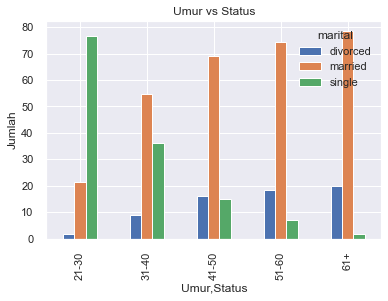

In [67]:
n_predictor('age_cat','marital')

##### Dari grafik dapat diketahui bahwa, semakin bertambah kelompok umur semakin menurun jumlah konsumen yang belum menikah dan semakin banyak orang yang sudah menikah dan bercerai

### 5.3.11 Status vs Personal Pinjaman,Cicilan Rumah,Gagal Bayar,

Text(0.5, 0, 'Status')

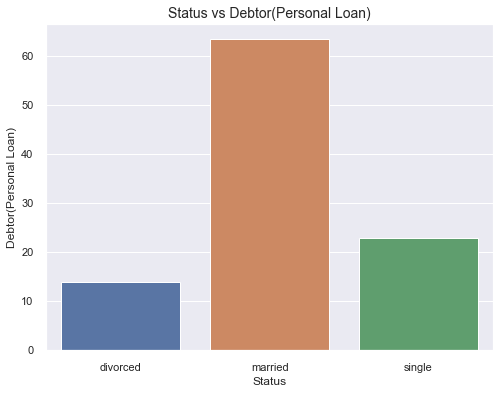

In [68]:
predictor_predictor_y ('loan','marital')

Text(0.5, 0, 'Status')

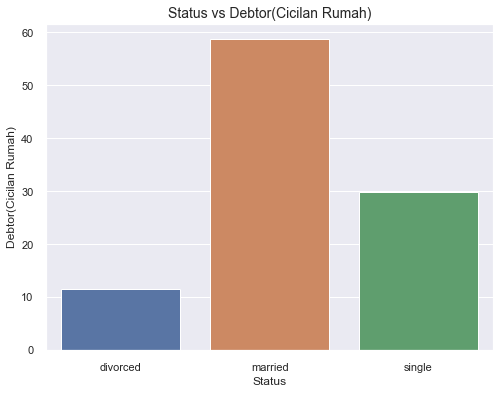

In [69]:
predictor_predictor_y ('housing','marital')

Text(0.5, 0, 'Status')

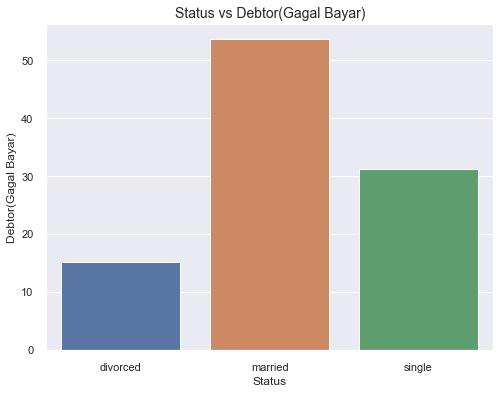

In [70]:
predictor_predictor_y ('default','marital')

##### Dari hubungan ketiga barchart diatas dapat diketahui, bahwa konsumen yang paling banyak memiliki personal pinjaman, ciciilan rumah, dan gagal bayar adalah konsumen yang sudah menikah, lalu diikuti konsumen single dan terakhir yang sudah bercerai (Menjawab faktor lain pada bahasan 5.3.9)

### 5.3.12 Pendidikan vs Pekerjaan

Text(0.5, 0, 'Pekerjaan,Pendidikan')

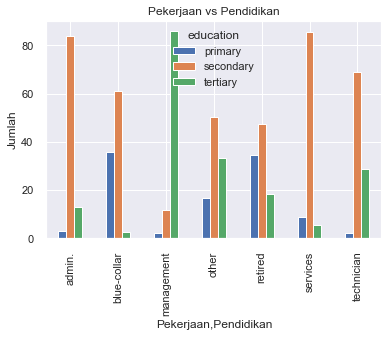

In [71]:
n_predictor('job','education')

##### Pekerjaan management memiliki status pendidikan tertinggi yang berbeda dibandigkan lainnya, orang yang bekerja dibidang management mayoritas adalah orang yang memiliki status pendidikan tertiary

### 5.3.13 Umur vs Pekerjaan, Pendidikan

Text(0.5, 0, 'Umur,Pekerjaan')

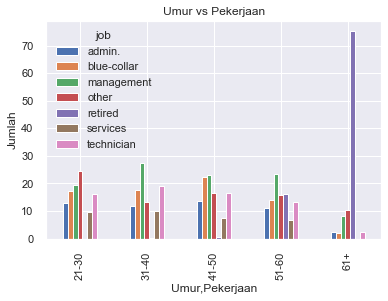

In [72]:
n_predictor('age_cat','job')

Text(0.5, 0, 'Umur,Pendidikan')

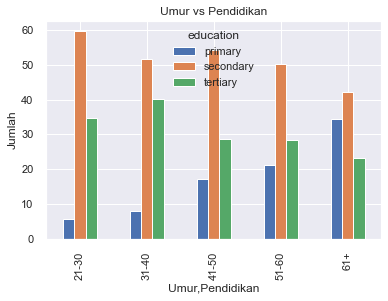

In [73]:
n_predictor('age_cat','education')

##### Dari dua barchat diatas, dapat disimpulkan bahwa konsumen pensinuan dan memiliki status pendidikan secondary adalah usia 61+, sedangkan yang bekerja sebagai managament dan memiliki status pendidikan tertiary paling banyak berasal dari kelompok 31-40. 

##### Dapat diasumsikan bahwa semakin tinggi status pendidikan, semakin bagus level pekerjaan dan semakin besar income yang didapatkan. (Menjawab faktor lain pada bahasan 5.3.9)

### 5.3.14 Kesimpulan Consumer's Profile

#### Rekomendasi profile konsumen untuk target marketing campaign apabila marketing cost terbatas :

1. Usia produktif 21-30 <br/>
   Single <br/>
   Status pendidikan tertiary <br/>
   Bekerja pada bidang management <br/>
   Punya/tidak punya pinjaman dan cicilan rumah <br/>
   Tidak pernah gagal bayar
   
   

2. Usia pensiun 61+ <br/>
   Tidak punya pinjaman dan cicilan rumah <br/>
   Tidak pernah gagal bayar
   

## 5.4 Campaign Method 

### 5.4.1 Jumlah Campaign vs Conversion Rate

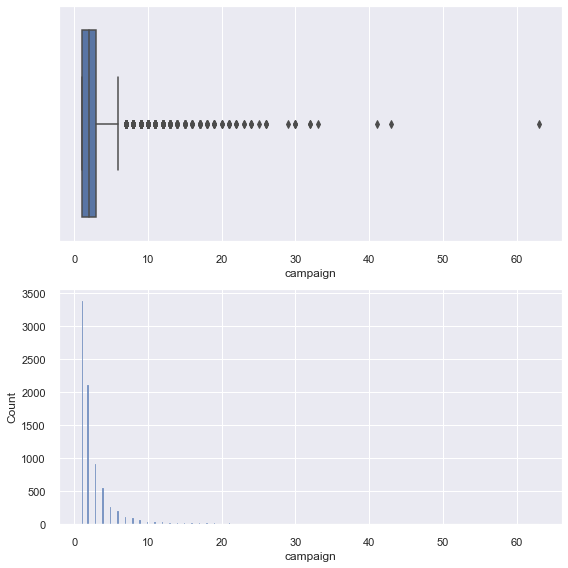

In [74]:
hist_boxplot(X_train,'campaign')

In [75]:
#cek outlier
X_train['outlier_campaign'] = outlier(X_train,'campaign')
X_train[X_train['outlier_campaign']=='outlier']

 outlier lower limit : -2.0 
 outlier upper limit : 6.0


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,age_cat,outlier_campaign
361,41,blue-collar,single,secondary,no,75,yes,no,1,jul,9,-1,0,1,41-50,outlier
812,46,technician,single,tertiary,no,4414,no,no,18,aug,7,-1,0,1,41-50,outlier
8388,55,technician,married,secondary,no,312,no,no,6,feb,8,9,3,0,51-60,outlier
4921,36,services,divorced,secondary,yes,0,no,yes,15,jul,7,-1,0,1,31-40,outlier
1044,39,admin.,single,secondary,no,2263,yes,yes,21,nov,9,-1,0,1,31-40,outlier
618,46,other,married,secondary,no,271,yes,no,30,jul,29,-1,0,1,41-50,outlier
4338,27,services,married,secondary,no,0,yes,no,22,jul,13,-1,0,1,21-30,outlier
7116,36,admin.,single,secondary,no,1328,no,no,30,jul,9,-1,0,0,31-40,outlier
7888,37,technician,married,secondary,no,1580,no,no,22,aug,12,-1,0,0,31-40,outlier
8231,54,other,married,primary,no,3151,no,no,18,jun,7,-1,0,0,51-60,outlier


In [76]:
(X_train['outlier_campaign'].value_counts(normalize=True))*100

not-outlier    94.637143
outlier         5.362857
Name: outlier_campaign, dtype: float64

karna outlier mengandung informasi terkait kolom lain, maka outlier dipertahankan untuk proses EDA

In [77]:
#drop feature outlier_campaign
X_train = X_train.drop('outlier_campaign',axis=1)

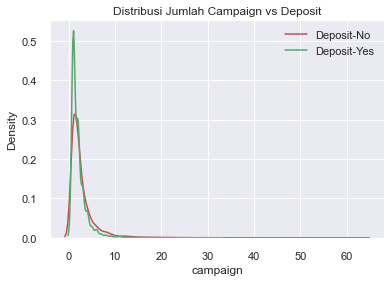

In [78]:
sns.distplot(X_train[X_train['deposit']==0]['campaign'],color='r',hist=False,label='Deposit-No')
sns.distplot(X_train[X_train['deposit']==1]['campaign'],color='g',hist=False,label='Deposit-Yes')
plt.title('Distribusi Jumlah Campaign vs Deposit',fontsize=12)
plt.legend()

In [79]:
deposit_yes_3 = X_train[X_train['deposit']==1]['campaign']
deposit_no_3 = X_train[X_train['deposit']==0]['campaign']

alpha = 0.05
t_value3,p_value3 = stats.ttest_ind(deposit_yes_3,deposit_no_3)

if p_value3 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value3} kurang dari alpha {alpha}')
    print('Ada perbedaan signifikan deposit dari jumlah campaign')

else :
    print(f'Kesimpulan : nilai p_value {p_value3} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan signifikan deposit dari segi campaign')

Kesimpulan : nilai p_value 7.863555840235959e-29 kurang dari alpha 0.05
Ada perbedaan signifikan deposit dari jumlah campaign


In [80]:
(X_train['campaign'].value_counts(normalize=True))*100

1     43.338026
2     27.006272
3     11.672853
4      6.885959
5      3.238193
6      2.495840
7      1.241521
8      1.139127
9      0.716754
10     0.396775
11     0.319980
12     0.319980
13     0.230385
15     0.140791
14     0.140791
17     0.115193
16     0.076795
18     0.076795
21     0.063996
19     0.063996
26     0.038398
24     0.038398
22     0.038398
20     0.038398
30     0.038398
23     0.025598
32     0.025598
41     0.012799
63     0.012799
29     0.012799
33     0.012799
25     0.012799
43     0.012799
Name: campaign, dtype: float64

In [81]:
#mengelompokkan campaign

def bin_campaign (x) :
    if x<=3 :
        return '1-3'
    elif x<=6 :
        return '4-6'
    else :
        return '7+'

##### Pengelompokan kategori campaign berdasarkan persentase jumlah konsumen yang dicontact  

In [82]:
X_train['campaign_cat'] = X_train['campaign'].apply(bin_campaign)
X_train['campaign_cat'].unique()

array(['1-3', '7+', '4-6'], dtype=object)

Text(0.5, 0, 'Jumlah Campaign')

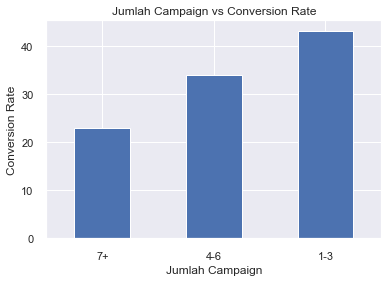

In [83]:
#hubungan jumlah campaign dengan conversion rate
predictor_target('campaign_cat')

Jumlah campaign mempengaruhi conversion rate. Semakin banyak nasabah yang dikontak, semakin menurun conversion rate. Jumlah campaign maksimal 3x memiliki nilai conversion rate tertinggi yaitu 43.2%

### 5.4.2 Last Contact (Quarter) vs Conversion Rate

In [84]:
X_train['month'].unique()

array(['jul', 'apr', 'aug', 'jan', 'feb', 'may', 'oct', 'jun', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [85]:
quarter_dict = {
    'jan' : '1Q',
    'feb' : '1Q',
    'mar' : '1Q', 
    'apr' : '2Q', 
    'may' : '2Q',
    'jun' : '2Q',
    'jul' : '3Q', 
    'aug' : '3Q',
    'sep' : '3Q', 
    'oct' : '4Q', 
    'nov' : '4Q',
    'dec' : '4Q'}

In [86]:
X_train['quarter'] = X_train['month'].map(quarter_dict)
X_train['quarter'].unique()

array(['3Q', '2Q', '1Q', '4Q'], dtype=object)

Text(0.5, 0, 'Last Contact(Q)')

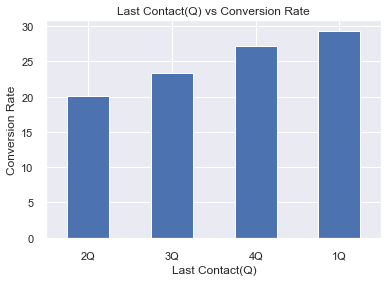

In [87]:
#hubungan last contact(quarter) dengan conversion rate
predictor_target('quarter')

In [88]:
chi_statistik('quarter','deposit')

Chi-square Statistic : 141.92489092384753 ,p-value: 1.4534469560257042e-30 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi last contact(quarter)


Last contact pada 1Q memiliki conversion rate paling tinggi yaitu 29.4%

### 5.4.3 Last Contact (Week) vs Conversion Rate

In [89]:
X_train['day'].unique()

array([ 9, 13,  1, 18, 28,  6,  4,  3, 15, 12, 29, 21, 27,  7, 22,  2,  5,
       23, 30, 11, 17, 26, 25, 20, 16, 19,  8, 10, 24, 14, 31],
      dtype=int64)

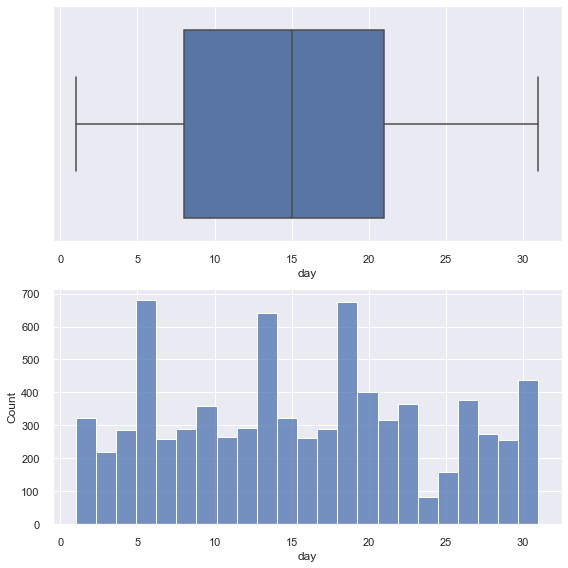

In [90]:
hist_boxplot(X_train,'day')

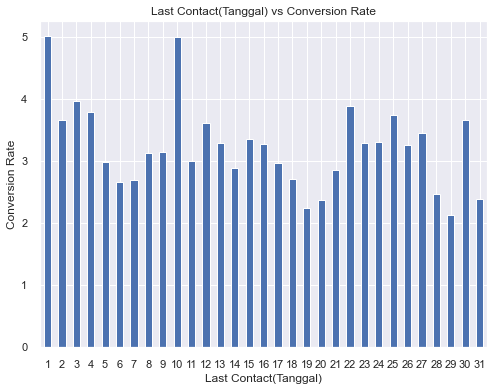

In [91]:
#hubungan last contact dengan conversion rate

plt.figure(figsize=(8,6))
((X_train.groupby(['day'])['deposit'].mean())/((X_train.groupby(['day'])['deposit'].mean()).sum())*100).sort_index(ascending=True).plot(kind='bar')
plt.title('Last Contact(Tanggal) vs Conversion Rate',fontsize=12)
plt.ylabel('Conversion Rate',fontsize=12)
plt.xlabel('Last Contact(Tanggal)',fontsize=12)
plt.xticks(rotation=0);
plt.show()

In [92]:
#mengelompokkan tanggal

def bin_day (x) :
    if x<=7 :
        return '1W'
    elif x<=14 :
        return '2W'
    elif x<=21 :
        return '3W'
    else :
        return '4W'

In [93]:
X_train['week'] = X_train['day'].apply(bin_day)
X_train['week'].unique()

array(['2W', '1W', '3W', '4W'], dtype=object)

Text(0.5, 0, 'Last Contact(W)')

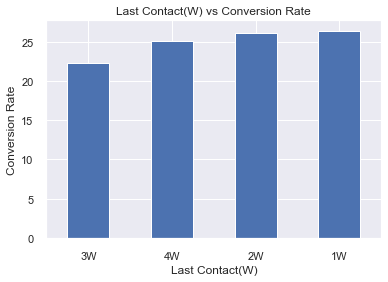

In [94]:
#hubungan last contact dengan conversion rate
predictor_target('week')

In [95]:
chi_statistik('week','deposit')

Chi-square Statistic : 32.07707842940345 ,p-value: 5.041323674964882e-07 kurang dari 0.05 
Terdapat perbedaan conversion rate yang signifikan dari segi last contact(week)


Last contact pada 1W (26.5%) dan 2W (26.1%) memiliki conversion rate yang tidak jauh berbeda 

### 5.4.4 Jumlah Kontak Sebelum Campaign vs Conversion Rate

<AxesSubplot:xlabel='previous', ylabel='Count'>

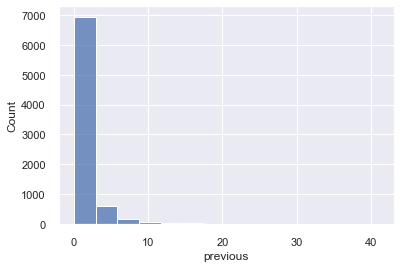

In [96]:
sns.histplot(X_train['previous'])

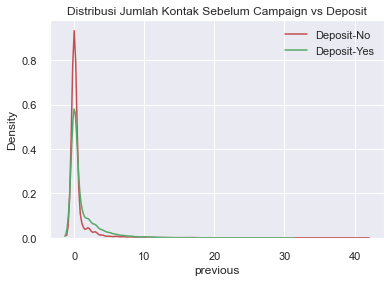

In [97]:
sns.distplot(X_train[X_train['deposit']==0]['previous'],color='r',hist=False,label='Deposit-No')
sns.distplot(X_train[X_train['deposit']==1]['previous'],color='g',hist=False,label='Deposit-Yes')
plt.title('Distribusi Jumlah Kontak Sebelum Campaign vs Deposit',fontsize=12)
plt.legend()

In [98]:
deposit_yes_4 = X_train[X_train['deposit']==1]['previous']
deposit_no_4 = X_train[X_train['deposit']==0]['previous']

alpha = 0.05
t_value4,p_value4 = stats.ttest_ind(deposit_yes_4,deposit_no_4)

if p_value3 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value4} kurang dari alpha {alpha}')
    print('Ada perbedaan signifikan deposit dari segi jumlah kontak sebelum campaign')

else :
    print(f'Kesimpulan : nilai p_value {p_value4} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan signifikan deposit dari segi jumlah kontak sebelum campaign')

Kesimpulan : nilai p_value 4.7004333105264304e-40 kurang dari alpha 0.05
Ada perbedaan signifikan deposit dari segi jumlah kontak sebelum campaign


In [99]:
((X_train['previous'].value_counts(normalize=True))*100).sort_index(ascending=True)

0     75.092794
1      7.820300
2      5.977217
3      3.942148
4      2.137463
5      1.446307
6      1.011135
7      0.703955
8      0.550365
9      0.268783
10     0.243184
11     0.230385
12     0.140791
13     0.076795
14     0.051197
15     0.038398
16     0.025598
17     0.076795
19     0.038398
20     0.012799
23     0.025598
26     0.012799
27     0.012799
28     0.012799
29     0.012799
30     0.012799
37     0.012799
41     0.012799
Name: previous, dtype: float64

In [100]:
X_train['previous'].describe()

count    7813.000000
mean        0.802253
std         2.135139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        41.000000
Name: previous, dtype: float64

In [101]:
#karna data 75% adalah 0 --> tidak bisa dibinning
X_train['is_contact'] = X_train['previous'].apply(lambda x : 0 if x<=0 else 1)

Text(0.5, 0, 'Contact/Tidak')

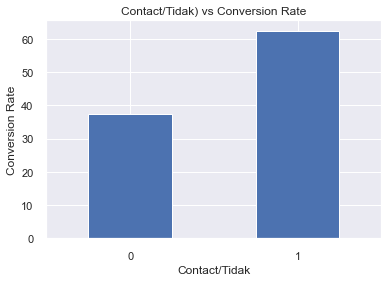

In [102]:
#hubungan last contact dengan conversion rate
predictor_target('is_contact')

Konsumen yang pernah dikontak sebelum campaign (62.6%) memiliki conversion rate lebih tinggi daripada yang tidak (37.4%)

### 5.4.5 Kesimpulan

Berdasarkan hasil analisa, dapat disimpulkan metode campaign yang dapat meningkatkan conversion rate : <br/>
1. Jumlah maksimal campaign adalah 3
2. Campaign lebih baik dilakukan saat 1Q
3. Campaign lebih baik dilakukan saat rentang 1W-2W dalam 1 bulan
4. Menghubungi konsumen sebelum campaign


## 6. Data Preprosesing

### 6.1 Replace Categorical to Numeric (X_train)

##### Umur

In [103]:
#filter data dibawah 80
X_train = X_train[X_train['age']<=80]

##### Personal Loan

In [104]:
X_train['loan'] = X_train['loan'].replace(['yes','no'],[1,0])
X_train['loan'].unique()

array([0, 1], dtype=int64)

##### Cicilan Rumah

In [105]:
X_train['housing'] = X_train['housing'].replace(['yes','no'],[1,0])
X_train['housing'].unique()

array([1, 0], dtype=int64)

##### Gagal Bayar

In [106]:
X_train['default'] = X_train['default'].replace(['yes','no'],[1,0])
X_train['default'].unique()

array([0, 1], dtype=int64)

##### Pendidikan

In [107]:
X_train['education'] = X_train['education'].replace(['primary','secondary','tertiary'],[1,2,3])
X_train['education'].unique()

array([2, 3, 1], dtype=int64)

##### Pekerjaan

In [108]:
X_train['job'].unique()

array(['technician', 'blue-collar', 'other', 'admin.', 'services',
       'management', 'retired'], dtype=object)

In [109]:
X_train= pd.get_dummies(X_train,columns=["job"])

In [110]:
X_train.head()

,age,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,age_cat,campaign_cat,quarter,week,is_contact,job_admin.,job_blue-collar,job_management,job_other,job_retired,job_services,job_technician
7968,57,married,2,0,950,1,0,9,jul,1,-1,0,0,51-60,1-3,3Q,2W,0,0,0,0,0,0,0,1
1456,34,single,3,0,925,1,0,13,apr,1,-1,0,1,31-40,1-3,2Q,2W,0,0,0,0,0,0,0,1
361,41,single,2,0,75,1,0,1,jul,9,-1,0,1,41-50,7+,3Q,1W,0,0,1,0,0,0,0,0
812,46,single,3,0,4414,0,0,18,aug,7,-1,0,1,41-50,7+,3Q,3W,0,0,0,0,0,0,0,1
1092,28,single,2,0,4465,0,0,28,jan,1,-1,0,1,21-30,1-3,1Q,4W,0,0,0,0,1,0,0,0


In [111]:
X_train=X_train.drop('job_blue-collar',axis=1) #menghindari perfect multicolinearity

##### Status Pernikahan

In [112]:
X_train= pd.get_dummies(X_train,columns=["marital"])

In [113]:
X_train.head()

,age,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,age_cat,campaign_cat,quarter,week,is_contact,job_admin.,job_management,job_other,job_retired,job_services,job_technician,marital_divorced,marital_married,marital_single
7968,57,2,0,950,1,0,9,jul,1,-1,0,0,51-60,1-3,3Q,2W,0,0,0,0,0,0,1,0,1,0
1456,34,3,0,925,1,0,13,apr,1,-1,0,1,31-40,1-3,2Q,2W,0,0,0,0,0,0,1,0,0,1
361,41,2,0,75,1,0,1,jul,9,-1,0,1,41-50,7+,3Q,1W,0,0,0,0,0,0,0,0,0,1
812,46,3,0,4414,0,0,18,aug,7,-1,0,1,41-50,7+,3Q,3W,0,0,0,0,0,0,1,0,0,1
1092,28,2,0,4465,0,0,28,jan,1,-1,0,1,21-30,1-3,1Q,4W,0,0,0,1,0,0,0,0,0,1


In [114]:
X_train=X_train.drop('marital_married',axis=1) #menghindari perfect multicolinearity

##### Last Contact(Quarter)

In [115]:
qn_dict = {
    'jan' : 1,
    'feb' : 1,
    'mar' : 1, 
    'apr' : 2, 
    'may' : 2,
    'jun' : 2,
    'jul' : 3, 
    'aug' : 3,
    'sep' : 3, 
    'oct' : 4, 
    'nov' : 4,
    'dec' : 4}

In [116]:
X_train['quarter_num'] =X_train['month'].map(qn_dict)
X_train['quarter_num'].unique()

array([3, 2, 1, 4], dtype=int64)

##### Last Contact(Week)

In [117]:
def bin_day_num (x) :
    if x<=7 :
        return 1
    elif x<=14 :
        return 2
    elif x<=21 :
        return 3
    else :
        return 4

In [118]:
X_train['week_num'] =X_train['day'].apply(bin_day_num)
X_train['week_num'].unique()

array([2, 1, 3, 4], dtype=int64)

#### Drop Feature berdasarkan EDA

Berdasarkan hasil EDA, berikut adalah feature-feature yang akan didrop :

1. Balance ---> nilai p-value lebih dari alpha
2. Day ---> diwakilkan oleh week_num
3. Month ---> diwakilkan oleh quarter_num
4. pdays ---> diwakilkan oleh is_contact
5. previous ---> diwakilkan oleh is_contact
6. deposit ---> agar data x hanya berisi predictor
7. age_cat --> diwakilkan oleh age
8. campaign_cat ---> diwakilkan oleh campaign
9. quarter ---> diwakilkan oleh quarter_num
10. week ---> diwakilkan oleh week_num

In [119]:
y_train = X_train['deposit']
X_train = X_train.drop('deposit',axis=1)

In [120]:
list_drop =['balance','day','month','pdays','previous','age_cat','campaign_cat','quarter','week']

In [121]:
X_train = X_train.drop(list_drop,axis=1)

In [122]:
X_train.head()

,age,education,default,housing,loan,campaign,is_contact,job_admin.,job_management,job_other,job_retired,job_services,job_technician,marital_divorced,marital_single,quarter_num,week_num
7968,57,2,0,1,0,1,0,0,0,0,0,0,1,0,0,3,2
1456,34,3,0,1,0,1,0,0,0,0,0,0,1,0,1,2,2
361,41,2,0,1,0,9,0,0,0,0,0,0,0,0,1,3,1
812,46,3,0,0,0,7,0,0,0,0,0,0,1,0,1,3,3
1092,28,2,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4


### 6.2 Replace Categorical to Numeric (X_test)

In [123]:
info_data(X_test)

Number of Rows,Columns (3349, 14)
Number of Duplicated Values 1


,Missing_value,Percent_missing_%,Data_type,Number of Unique
age,0,0.0,int64,74
job,0,0.0,object,12
marital,0,0.0,object,3
education,0,0.0,object,4
default,0,0.0,object,2
balance,0,0.0,int64,1909
housing,0,0.0,object,2
loan,0,0.0,object,2
day,0,0.0,int64,31
month,0,0.0,object,12


#####  Umur

In [124]:
X_test = X_test[X_test['age']<=80]

##### Personal Loan

In [125]:
X_test['loan'] = X_test['loan'].replace(['yes','no'],[1,0])
X_test['loan'].unique()

array([0, 1], dtype=int64)

##### Cicilan Rumah

In [126]:
X_test['housing'] = X_test['housing'].replace(['yes','no'],[1,0])
X_test['housing'].unique()

array([0, 1], dtype=int64)

##### Gagal Bayar

In [127]:
X_test['default'] = X_test['default'].replace(['yes','no'],[1,0])
X_test['default'].unique()

array([0, 1], dtype=int64)

##### Pendidikan

In [128]:
X_test['education'] =X_test['education'].replace('unknown','secondary')
X_test['education'] = X_test['education'].replace(['primary','secondary','tertiary'],[1,2,3])
X_test['education'].unique()

array([2, 3, 1], dtype=int64)

##### Pekerjaan

In [129]:
X_test['job'] =X_test['job'].replace(['entrepreneur','self-employed','student','unemployed','housemaid','unknown'],
                                       ['other','other','other','other','other','other'])

In [130]:
X_test['job'].unique()

array(['retired', 'blue-collar', 'technician', 'management', 'admin.',
       'other', 'services'], dtype=object)

In [131]:
X_test= pd.get_dummies(X_test,columns=['job'])
X_test=X_test.drop('job_blue-collar',axis=1)
X_test.head()

,age,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,job_admin.,job_management,job_other,job_retired,job_services,job_technician
5527,65,divorced,2,0,744,0,0,5,jul,1,-1,0,0,0,0,0,1,0,0
4541,38,married,2,0,1627,0,0,16,jun,9,-1,0,1,0,0,0,0,0,0
1964,35,single,2,0,4963,1,0,14,may,1,300,1,1,0,0,0,0,0,0
5007,47,married,2,0,8229,0,0,8,aug,2,-1,0,1,0,0,0,0,0,0
8928,35,married,3,0,1473,1,0,12,may,3,-1,0,0,0,0,0,0,0,1


##### Status Pernikahan

In [132]:
X_test= pd.get_dummies(X_test,columns=['marital'])
X_test=X_test.drop('marital_married',axis=1)
X_test.head()

,age,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit,job_admin.,job_management,job_other,job_retired,job_services,job_technician,marital_divorced,marital_single
5527,65,2,0,744,0,0,5,jul,1,-1,0,0,0,0,0,1,0,0,1,0
4541,38,2,0,1627,0,0,16,jun,9,-1,0,1,0,0,0,0,0,0,0,0
1964,35,2,0,4963,1,0,14,may,1,300,1,1,0,0,0,0,0,0,0,1
5007,47,2,0,8229,0,0,8,aug,2,-1,0,1,0,0,0,0,0,0,0,0
8928,35,3,0,1473,1,0,12,may,3,-1,0,0,0,0,0,0,0,1,0,0


##### Last Contact(Quarter)

In [133]:
X_test['quarter_num'] =X_test['month'].map(qn_dict)
X_test['quarter_num'].unique()

array([3, 2, 1, 4], dtype=int64)

##### Last Contact(Week)

In [134]:
X_test['week_num'] =X_test['day'].apply(bin_day_num)
X_test['week_num'].unique()

array([1, 3, 2, 4], dtype=int64)

##### Contact/Tidak

In [135]:
X_test['is_contact'] = X_test['previous'].apply(lambda x : 0 if x<=0 else 1)
X_test['is_contact'].unique()

array([0, 1], dtype=int64)

##### Cek Feature Train dan Test

In [136]:
y_test = X_test['deposit']
X_test = X_test.drop('deposit',axis=1)

In [137]:
X_test = X_test[X_train.columns]
X_test.head()

,age,education,default,housing,loan,campaign,is_contact,job_admin.,job_management,job_other,job_retired,job_services,job_technician,marital_divorced,marital_single,quarter_num,week_num
5527,65,2,0,0,0,1,0,0,0,0,1,0,0,1,0,3,1
4541,38,2,0,0,0,9,0,0,0,0,0,0,0,0,0,2,3
1964,35,2,0,1,0,1,1,0,0,0,0,0,0,0,1,2,2
5007,47,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,2
8928,35,3,0,1,0,3,0,0,0,0,0,0,1,0,0,2,2


In [138]:
X_train.head()

,age,education,default,housing,loan,campaign,is_contact,job_admin.,job_management,job_other,job_retired,job_services,job_technician,marital_divorced,marital_single,quarter_num,week_num
7968,57,2,0,1,0,1,0,0,0,0,0,0,1,0,0,3,2
1456,34,3,0,1,0,1,0,0,0,0,0,0,1,0,1,2,2
361,41,2,0,1,0,9,0,0,0,0,0,0,0,0,1,3,1
812,46,3,0,0,0,7,0,0,0,0,0,0,1,0,1,3,3
1092,28,2,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4


Train dan test memiliki feature yang sama

# 7. Model

## 7.1 Logistic Regression

In [139]:
logreg_model = LogisticRegression(random_state=42)

 Recall Score : 0.5960065645514223
 Precision Score : 0.6425833087584784
 F1 Score : 0.6184191854689939
 ROC-AUC Score : 0.6425833087584784


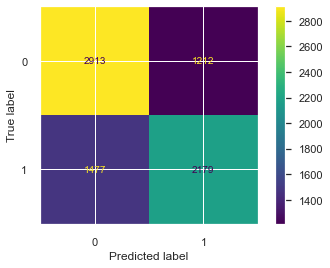

In [140]:
eval_train(X_train,y_train,logreg_model)

 Recall Score : 0.5880503144654088
 Precision Score : 0.655680224403927
 F1 Score : 0.620026525198939
 ROC-AUC Score : 0.655680224403927


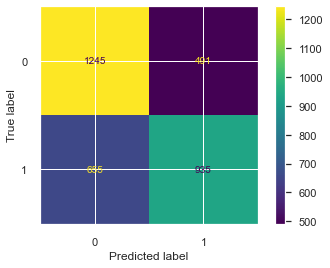

In [141]:
eval_test(X_test,y_test,logreg_model)

## 7.2 KNN

In [142]:
knn_model = KNeighborsClassifier()

 Recall Score : 0.6613785557986871
 Precision Score : 0.7668886774500476
 F1 Score : 0.71023645175503
 ROC-AUC Score : 0.7668886774500476


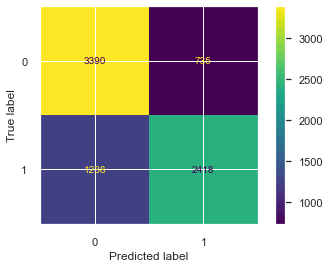

In [143]:
eval_train(X_train,y_train,knn_model)

 Recall Score : 0.5270440251572327
 Precision Score : 0.6193643754619365
 F1 Score : 0.5694869181107713
 ROC-AUC Score : 0.6193643754619365


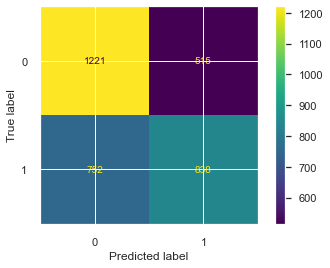

In [144]:
eval_test(X_test,y_test,knn_model)

## 7.3 Naive Bayes

In [145]:
naive = GaussianNB()

 Recall Score : 0.7106126914660832
 Precision Score : 0.5842140769057792
 F1 Score : 0.6412439837097371
 ROC-AUC Score : 0.5842140769057792


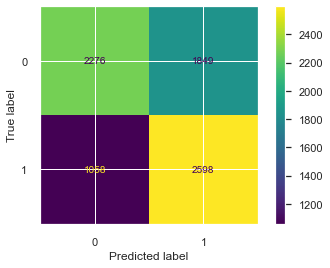

In [146]:
eval_train(X_train,y_train,naive)

 Recall Score : 0.6981132075471698
 Precision Score : 0.591684434968017
 F1 Score : 0.6405077899596076
 ROC-AUC Score : 0.591684434968017


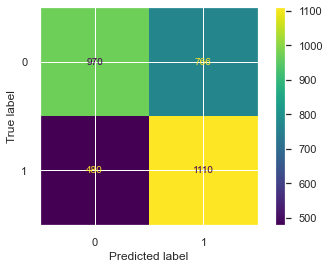

In [147]:
eval_test(X_test,y_test,naive)

## 7.4 Decision Tree

In [148]:
dt = DecisionTreeClassifier(random_state=42)

 Recall Score : 0.9655361050328227
 Precision Score : 0.9977388355002826
 F1 Score : 0.9813733666944676
 ROC-AUC Score : 0.9977388355002826


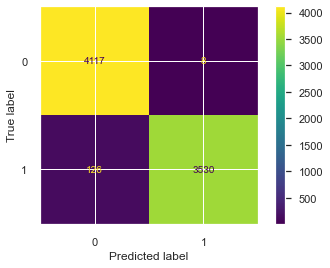

In [149]:
eval_train(X_train,y_train,dt)

 Recall Score : 0.5685534591194968
 Precision Score : 0.576530612244898
 F1 Score : 0.5725142495250158
 ROC-AUC Score : 0.576530612244898


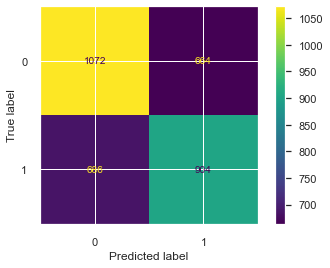

In [150]:
eval_test(X_test,y_test,dt)

## 7.5 Random Forest

In [151]:
rf = RandomForestClassifier(random_state=42)

 Recall Score : 0.975656455142232
 Precision Score : 0.9875415282392026
 F1 Score : 0.9815630159603743
 ROC-AUC Score : 0.9875415282392026


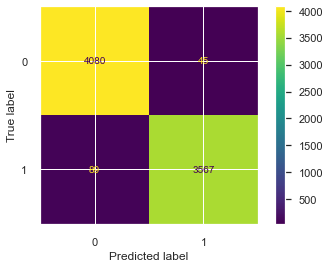

In [152]:
eval_train(X_train,y_train,rf)

 Recall Score : 0.5817610062893082
 Precision Score : 0.6597717546362339
 F1 Score : 0.6183155080213903
 ROC-AUC Score : 0.6597717546362339


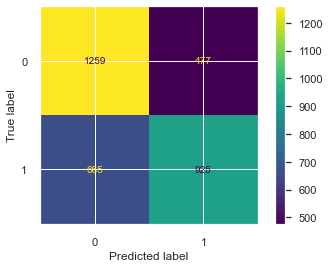

In [153]:
eval_test(X_test,y_test,rf)

### 7.5.1 Hyperparameter Tuning

In [154]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 300, 500, 600, 800]
max_depth = [5, 8,10, 15 ,20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10,20,30] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = RandomizedSearchCV(rf, hyperF, cv =5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


 Recall Score : 0.5741247264770241
 Precision Score : 0.7802973977695167
 F1 Score : 0.6615190671289002
 ROC-AUC Score : 0.7802973977695167


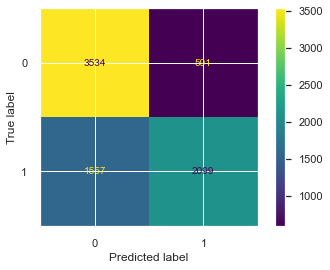

In [155]:
eval_test(X_train,y_train,bestF)

 Recall Score : 0.5213836477987421
 Precision Score : 0.7349290780141844
 F1 Score : 0.6100073583517293
 ROC-AUC Score : 0.7349290780141844


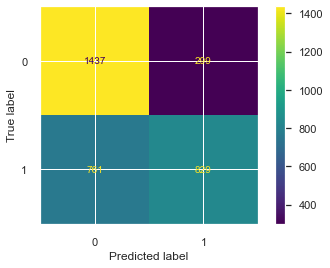

In [156]:
eval_test(X_test,y_test,bestF)

##### Model yang dipilih adalah Random Forest dengan Hyperparameter Tuning karna memiliki ROC-AUC Score paling tinggi yaitu, 72%. Semakin besar nilai ROC-AUC Score semakin baik model dalam memisahkan nilai 0 dan 1


##### Karna data yang dianalisa adalah data balance dan fokus pada case ini adalah meminimalisir false negatif, maka perlu dilakukan adjust threshold untuk meningkatkan Recall Score

## 8. ROC Curve

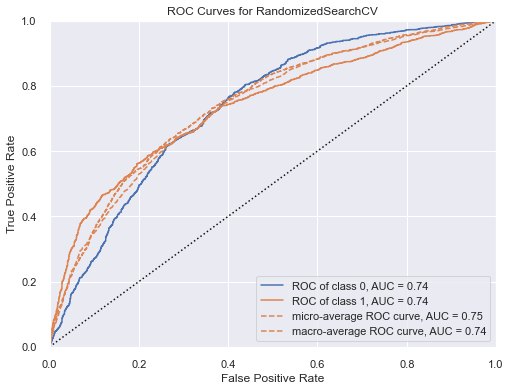

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [157]:
#grafik ROC
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(8,6))
oz = ROCAUC(bestF)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

## 9. Adjust Threshold

In [158]:
#treshold pake g-mean

from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,bestF.predict_proba(X_test)[:,1])

roc_auc_value = roc_auc_score(y_test,bestF.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest Tuning  on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest Tuning on test data: ', round(gini_value*100, 2), '%')

AUC for Random Forest Tuning  on test data:  73.77 %
Gini for Random Forest Tuning on test data:  47.54 %


In [159]:
# Calculate the G-mean
gmean = np.sqrt(true_positive_rate * (1 - false_positive_rate))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(threshold[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(false_positive_rate[index], ndigits = 4)
tprOpt = round(true_positive_rate[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.4587 with G-Mean: 0.6773
FPR: 0.2321, TPR: 0.5975


Recall Score 0.720754716981132
precission Score  0.640581330352152
F1 Score 0.6783071914767682
ROC-Auc Score 0.6751815059560038


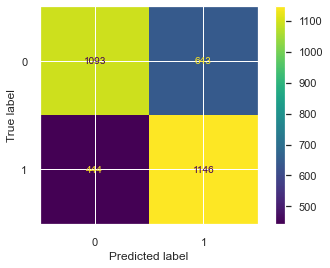

In [160]:
thrshold = 0.40

pred = []

for x in bestF.predict_proba(X_test)[:,1]:
    if x >= thrshold:
        pred.append(1)
    else:
        pred.append(0)

# predict test
cm = confusion_matrix(y_test, pred, labels=bestF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=bestF.classes_)

    
print(f"Recall Score {recall_score(y_test,pred)}")
print(f'precission Score  {precision_score(y_test,pred)}')
print(f'F1 Score {f1_score(y_test,pred)}')
print(f'ROC-Auc Score {roc_auc_score(y_test,pred)}')
disp.plot()

##### Adjusted Threshold yang digunakan adalah 0.40. Dengan threshold tersebut, nilai Recall Score meningkat dari 55% ke 71.8%

## 10. Lift Curve and Cummulative Gain

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

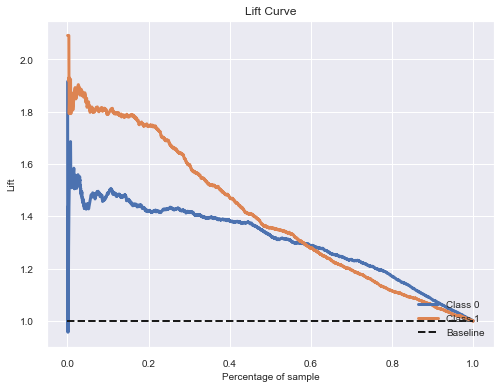

In [161]:
skplt.metrics.plot_lift_curve(y_test,bestF.predict_proba(X_test), title='Lift Curve',figsize=(8,6))

##### Berdasarkan lift curcve, dapat disimpulkan bahwa model Random Forest dengan Tuning Hyperparameter lebih baik 1.5x daripada random choice

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

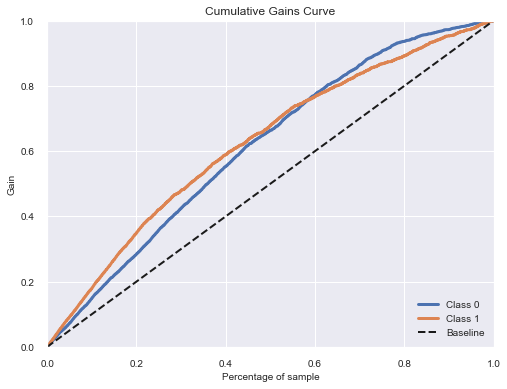

In [162]:
#Cummulatve
skplt.metrics.plot_cumulative_gain(y_test,bestF.predict_proba(X_test), title='Cumulative Gains Curve',figsize=(8,6))

##### Pada persentase sampel 40%, jika menggunakan model akan mendapatkan 60% konsumen yang membuka deposit, tetapi jika random choice hanya 20% konsumen yang membuka deposit